In [1]:
import pandas as pd
from confidence import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Prepare dataset

data = pd.read_csv('~/Datasets/wdbc.data.txt', sep = ',', header=None)
data = data.drop(0, axis=1) #id attribute
data[1] = data[1].replace(['B', 'M'], [0, 1])  
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [4]:
y = data[1]
X = data.drop(1, axis = 1)

y = np.ravel(y)
len(y)

569

In [6]:
print np.unique(y, return_counts=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 
rbtsc = RobustScaler()
X_train = rbtsc.fit_transform(X_train)   # fit + transform
X_test = rbtsc.transform(X_test) 

(array([0, 1]), array([357, 212]))


### All Results in One Graph

Accuracy at threshold 0.0 is 0.364035087719
Accuracy at threshold 0.01 is 0.671052631579
Accuracy at threshold 0.02 is 0.736842105263
Accuracy at threshold 0.03 is 0.767543859649
Accuracy at threshold 0.04 is 0.811403508772
Accuracy at threshold 0.05 is 0.833333333333
Accuracy at threshold 0.06 is 0.842105263158
Accuracy at threshold 0.07 is 0.850877192982
Accuracy at threshold 0.08 is 0.872807017544
Accuracy at threshold 0.09 is 0.872807017544
Accuracy at threshold 0.1 is 0.872807017544
Accuracy at threshold 0.11 is 0.881578947368
Accuracy at threshold 0.12 is 0.885964912281
Accuracy at threshold 0.13 is 0.890350877193
Accuracy at threshold 0.14 is 0.894736842105
Accuracy at threshold 0.15 is 0.894736842105
Accuracy at threshold 0.16 is 0.907894736842
Accuracy at threshold 0.17 is 0.907894736842
Accuracy at threshold 0.18 is 0.907894736842
Accuracy at threshold 0.19 is 0.912280701754
Accuracy at threshold 0.2 is 0.916666666667
Accuracy at threshold 0.21 is 0.929824561404
Accuracy at t

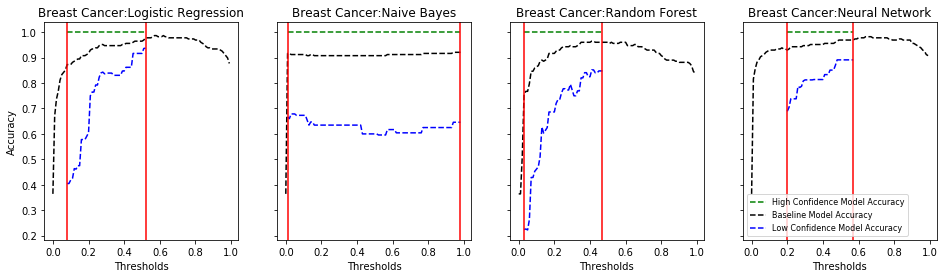

In [8]:
model = perform_logistic_regression(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(16,4))


ax1.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax1.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax1.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax1.axvline(conf_threshold[0], color='r')
ax1.axvline(conf_threshold[-1], color='r')
ax1.set_xlabel('Thresholds')
ax1.set_ylabel('Accuracy')
ax1.set_title('Breast Cancer:Logistic Regression')


model = perform_gaussian_nb(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax2.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax2.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax2.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax2.axvline(conf_threshold[0], color='r')
ax2.axvline(conf_threshold[-1], color='r')
ax2.set_xlabel('Thresholds')
ax2.set_title('Breast Cancer:Naive Bayes')



model = perform_random_forest(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax3.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax3.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax3.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax3.axvline(conf_threshold[0], color='r')
ax3.axvline(conf_threshold[-1], color='r')
ax3.set_xlabel('Thresholds')
ax3.set_title('Breast Cancer:Random Forest')



model = perform_neural_network(X_train, y_train)
full_threshold, conf_threshold, accuracy_model, accuracy_high_conf, accuracy_low_conf = get_all_accuracy_set_with_thresholds(model, X_train, y_train, X_test, y_test)
ax4.plot(conf_threshold,accuracy_high_conf, 'g--', label = "High Confidence Model Accuracy")
ax4.plot(full_threshold,accuracy_model, 'k--', label = "Baseline Model Accuracy")
ax4.plot(conf_threshold,accuracy_low_conf, 'b--', label = "Low Confidence Model Accuracy")
ax4.axvline(conf_threshold[0], color='r')
ax4.axvline(conf_threshold[-1], color='r')
ax4.set_xlabel('Thresholds')
ax4.set_title('Breast Cancer:Neural Network')

ax4.legend(loc='best', prop={'size': 8})
plt.show()   
